In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r'E:\ExcelR ass\SVM\SalaryData_Train(1).csv')
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape  #(30161, 14)

(30161, 14)

In [5]:
data["native"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [6]:
# distribution of Salary data :
data["Salary"].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [7]:
# info :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
# to check for null value :
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
# summary statistic :
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Salary"] = le.fit_transform(data["Salary"])
data["maritalstatus"] = le.fit_transform(data["maritalstatus"])
data["workclass"] = le.fit_transform(data["workclass"])
data["education"] = le.fit_transform(data["education"])
data["occupation"] = le.fit_transform(data["occupation"])
data["relationship"] = le.fit_transform(data["relationship"])
data["race"] = le.fit_transform(data["race"])
data["sex"] = le.fit_transform(data["sex"])
data["native"] = le.fit_transform(data["native"])
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [20]:
# feature selection : tree base feature selection :
from sklearn.tree import DecisionTreeClassifier
import numpy as np
array = data.values
x = array[:,0:13]
y = array[:,13]
model = DecisionTreeClassifier()
model.fit(x, y)
print(model.feature_importances_)
total = np.cumsum(model.feature_importances_)
total
l = model.feature_importances_>0.1
l

[0.17692399 0.04952786 0.01380081 0.13215843 0.01108201 0.08189864
 0.21928551 0.02206562 0.00627878 0.12706518 0.04205438 0.09816371
 0.01969507]


array([ True, False, False,  True, False, False,  True, False, False,
        True, False, False, False])

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 7)
x_train.shape, x_test.shape

((22620, 13), (7541, 13))

In [34]:
# apply svm using whole data :
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0)
svm.fit(x_train, y_train)
print("training accuracy :", svm.score(x_train, y_train))            # 92.5 % training accuracy
print("testing accuracy :", svm.score(x_test, y_test))               # 80.16 % testing accuracy

training accuracy : 0.9249778956675508
testing accuracy : 0.801617822569951


In [44]:
# age, educationno, relationship, capitalgain attributes has high impact on Salary :
new_x = data.iloc[:,[0,3,6,9]]
new_x.head()

,age,educationno,relationship,capitalgain
0,39,13,1,2174
1,50,13,0,0
2,38,9,1,0
3,53,7,0,0
4,28,13,5,0


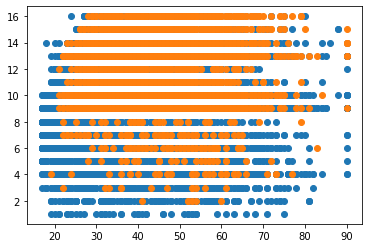

In [26]:
# visulizing age vs educationno column ;
plt.scatter(data["age"].loc[data.Salary == 0], data["educationno"].loc[data.Salary == 0])
plt.scatter(data["age"].loc[data.Salary == 1], data["educationno"].loc[data.Salary == 1])

In [45]:
#split data after feature selection :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.25, random_state = 7)
x_train.shape, x_test.shape

((22620, 4), (7541, 4))

In [32]:
# svm using important feature :
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0)
svm.fit(x_train, y_train)
print("training accuracy :", svm.score(x_train, y_train))      # 84.95 % training accuracy
print("testing accuracy :", svm.score(x_test, y_test))         # 84.72 % testing accuracy

training accuracy : 0.8495137046861185
testing accuracy : 0.8472351147062723


In [36]:
# RFE (feature selection):
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = data.values
x = array[:,0:13]
y = array[:,13]
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print(fit.ranking_)

C:\Users\mites\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

[ 5  4  7  1  1  9  2  3  1 11 10  6  8]


In [37]:
# new_data base on RFE :
x_rfe = data.iloc[:,[3,4,6,8]]
# x_rfe.head()


,educationno,maritalstatus,relationship,sex
0,13,4,1,1
1,13,2,0,1
2,9,0,1,1
3,7,2,0,1
4,13,2,5,0


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_rfe, y, test_size = 0.25, random_state = 7)
x_train.shape, x_test.shape

((22620, 4), (7541, 4))

In [39]:
# apply svm using feature derived using RFE :
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0)
svm.fit(x_train, y_train)
print("training accuracy :", svm.score(x_train, y_train))            # 81.6 % training accuracy
print("testing accuracy :", svm.score(x_test, y_test))               # 81.66 % testing accuracy

training accuracy : 0.8160477453580902
testing accuracy : 0.816602572603103


In [40]:
# for predicting testing data set :
test_data = pd.read_csv(r'E:\ExcelR ass\SVM\SalaryData_Test(1).csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [41]:
# conver test data :
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data["Salary"] = le.fit_transform(test_data["Salary"])
test_data["maritalstatus"] = le.fit_transform(test_data["maritalstatus"])
test_data["workclass"] = le.fit_transform(test_data["workclass"])
test_data["education"] = le.fit_transform(test_data["education"])
test_data["occupation"] = le.fit_transform(test_data["occupation"])
test_data["relationship"] = le.fit_transform(test_data["relationship"])
test_data["race"] = le.fit_transform(test_data["race"])
test_data["sex"] = le.fit_transform(test_data["sex"])
test_data["native"] = le.fit_transform(test_data["native"])
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [43]:
# to apply svm on feature exctracted using Tree Based feature selection method ;
test_1_x = test_data.iloc[:,[0,3,6,9]]
test_1_y = test_data.iloc[:,13]
test_1_x.shape, test_1_y.shape

((15060, 4), (15060,))

In [46]:
# svm model testing for tree base feature selection:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0)
svm.fit(x_train, y_train)
print("training accuracy :", svm.score(x_train, y_train))      # 84.95 % training accuracy
print("Testing accuracy for Test dataset :", svm.score(test_1_x, test_1_y))       # 84.70 % testing accuracy

training accuracy : 0.8495137046861185
Testing accuracy for Test dataset : 0.847011952191235


In [47]:
# to apply svm on feature exctracted using RFE feature selection method ;
test_2_x = test_data.iloc[:,[3,4,6,8]]
test_2_y = test_data.iloc[:,13]
test_2_x.shape, test_2_y.shape

((15060, 4), (15060,))

In [49]:
# apply svm on Testing dataset using feature derived using RFE :
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0)
svm.fit(x_train, y_train)
print("training accuracy :", svm.score(x_train, y_train))            # 81.6 % training accuracy
print("Testing accuracy for Test dataset (RFE) :", svm.score(test_2_x, test_2_y))     # 81.71 % testing accuracy       

training accuracy : 0.8160477453580902
Testing accuracy for Test dataset (RFE) : 0.8171314741035857


In [51]:
# SVM on Testing dataset without applying feature selection :
array = test_data.values
test_3_x = array[:,0:13]
test_3_y = array[:,13]
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0)
svm.fit(x_train, y_train)
print("training accuracy :", svm.score(x_train, y_train))            # 92.5 % training accuracy
print("Testing accuracy for test dataset :", svm.score(test_3_x, test_3_y))               # 79.85 % testing accuracy

training accuracy : 0.9249778956675508
Testing accuracy for test dataset : 0.798539176626826


In [ ]:
# Therefor, based on above calculations using different feature selection techniques we got 84.7 % accuracy on testing data using
# tree based feature selection method.
# Hence, model created using features ["age", "educationno", "relationship", "capitalgain"] has high impact and good accuracy on Teasing dataset.